In [1]:
import math

from utils import *
from datasets import *

import torch
from torch.utils.data import DataLoader
from torchvision.transforms import (
    Compose,
    Grayscale,
    Resize,
    ToTensor,
    CenterCrop
)

/home/user/ishfaqm0/miniconda3/envs/CudaLab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device is : {device}")

Device is : cuda:0


In [7]:
!nvidia-smi

Thu Sep  8 06:25:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 35%   32C    P8    21W / 350W |    108MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# seed for reproducibility
set_random_seed(24)

### Data Preparation and Exploration

TableChair Dataset

In [2]:
data_path = 'datasets/table_chair.h5'
batch_size=128
transforms = Compose([Resize(64), Grayscale(), ToTensor()])

In [3]:
def dataloader(
        data_path: str, training: bool, split_type: Literal["train", "valid", "test"], batch_size: int = 32, transforms: t.Optional[
        t.Callable[[np.ndarray], t.Union[torch.Tensor, np.ndarray]]
    ] = None,
    ) -> DataLoader:
        transforms = transforms
        loader = DataLoader(
            dataset=TableChairDataset(data_path, split_type, transforms),
            batch_size=batch_size,
            shuffle=training,
            drop_last=training,
            num_workers=0,
        )
        return loader

train_loader = dataloader(data_path, True, "train", batch_size=batch_size, transforms=transforms)
valid_loader = dataloader(data_path, False, "valid", batch_size=batch_size, transforms=transforms)
test_loader = dataloader(data_path, False, "test", batch_size=batch_size, transforms=transforms)

Simple Dataset

In [4]:
data_path = 'datasets/simple_dataset'
images_path = list(map(lambda x: os.path.join(os.path.abspath(data_path), x),os.listdir(data_path)))
batch_size=128
transforms = Compose([Resize(64), Grayscale(), ToTensor()])

In [5]:
simple_dataset = SimpleDataset(image_paths=images_path, transforms=transforms)

In [10]:
# Spliting dataset 
train_sampler, valid_sampler = split_dataset(simple_dataset, valid_size=0.2)

In [9]:
train_loader = torch.utils.data.DataLoader(
    simple_dataset, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(
    simple_dataset, batch_size=batch_size, sampler=valid_sampler)

MNIST Dataset

In [2]:
data_path = 'datasets/'
batch_size=128
transforms = Compose([Resize(64), ToTensor()])

In [3]:
from torchvision.datasets import MNIST

MNIST_data = MNIST(root=data_path, download=True, train=True, transform=transforms)
MNIST_data_test = MNIST(root=data_path, download=True, train=False, transform=transforms)
#len(MNIST_data)
mnist_dataset = MNISTDataset(dataset=MNIST_data, transforms=transforms)
mnist_dataset_test = MNISTDataset(dataset=MNIST_data_test, transforms=transforms)

In [4]:
# Spliting dataset 
train_sampler, valid_sampler = split_dataset(mnist_dataset, valid_size=0.2)

train_loader = torch.utils.data.DataLoader(
    mnist_dataset, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(
    mnist_dataset, batch_size=batch_size, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(
    mnist_dataset_test, batch_size=batch_size)

Pet Dataset

In [3]:
data_path = 'datasets/pet'
batch_size=128
transforms = Compose([ToTensor()])

tf_rgb = Compose([
    ToTensor(),
    Resize((64, 64))
    #CenterCrop((64, 64))
    #T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    
])

tf_gray = Compose([
    #CenterCrop((64,64)),
    Resize((64, 64)),
    PILToTensor_for_targets(),
])

In [4]:
from torchvision.datasets import OxfordIIITPet

pet_dataset_trainval = OxfordIIITPet(root = data_path, split="trainval", target_types="segmentation", transform=tf_rgb, target_transform=tf_gray, download=True)

pet_dataset_test = OxfordIIITPet(root = data_path, split="test", target_types="segmentation", transform=tf_rgb, target_transform=tf_gray, download=True)

In [5]:
pet_dataset_trainval = PetDataset(dataset=pet_dataset_trainval, transforms=transforms)
pet_dataset_test = PetDataset(dataset=pet_dataset_test, transforms=transforms)

In [6]:
# Spliting dataset 
train_sampler, valid_sampler = split_dataset(pet_dataset_trainval, valid_size=0.2)

train_loader = torch.utils.data.DataLoader(
    pet_dataset_trainval, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(
    pet_dataset_trainval, batch_size=batch_size, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(
    pet_dataset_test, batch_size=batch_size)

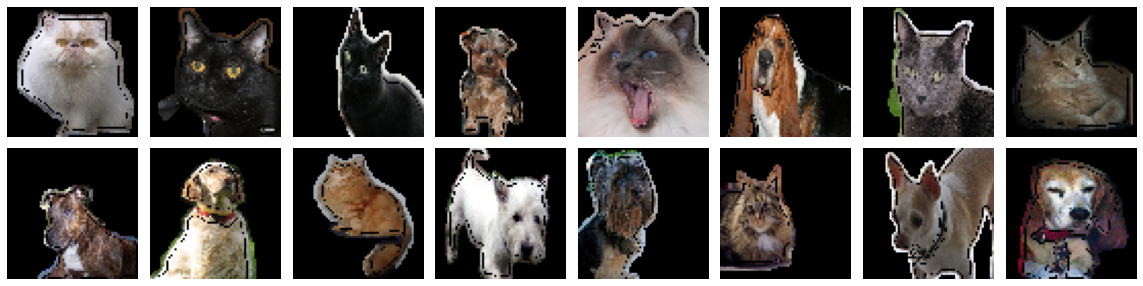

In [7]:
# Get a batch of training data and display it
inputs = next(iter(train_loader))

show_grid(inputs[0])